<a href="https://colab.research.google.com/github/RoetGer/decisions-under-uncertainty/blob/main/solved_problems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Ex**: Assume 100 iid samples from a Poisson distribution with mean 1. What is the probabílity that the sum of samples is below 90?

Solution approach:

*   X_i ~ Pois(lambda)
*   Assume Y = sum(X_i)
*   Realize that Y = n*mean(X)
*   P(Y <= 90) = P(n*mean(X) <= 90) = P(mean(X) <= 90/n) 
*   Use central limit theorem to approximate distribution of mean(X), that is mean(X) ~ N(lambda, lambda/n)
*   P(sqrt(n)(mean(X) - lambda)/sqrt(lambda) <= sqrt(n)(90/n - lambda)/sqrt(lambda))



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy.stats import norm

plt.rc('figure', figsize=(12, 10))
plt.rc('font', size=12)

In [ ]:
n = 100
val_to_compare = 90
pois_lambda = 1

stand_X = np.sqrt(n)*(1 - pois_lambda)/np.sqrt(pois_lambda)
stand_90 = np.sqrt(n)*(val_to_compare/n - pois_lambda)/np.sqrt(pois_lambda)

norm.cdf(stand_90, loc=0, scale=1)

0.15865525393145707

In [ ]:
norm.cdf(0.9, loc=1., scale=np.sqrt(pois_lambda/n))

0.15865525393145707

In [ ]:
norm.cdf(90, loc=n*pois_lambda, scale=np.sqrt(n*pois_lambda))

0.15865525393145707

Alternativey, just look at the sum, this one would also need to converge to a Gaussian

E[X1 + X2 + ... + X100] = nE[X] = 100

V[X1 + X2 + ... + X100] = nV[X] = 100

--> N(100, 100)

In [ ]:
import scipy.stats as sps

sps.norm.cdf(90, loc=100, scale=10)

0.15865525393145707

Simulation study to test results ;)

In [ ]:
samples = np.random.poisson(lam=1., size=(100000, n))
np.mean(samples.sum(axis=1) < 90)

0.14605

Difference can be explained that for the actual random variable of sum over the different samples, having a sum of 90 has a positive probability. In contrast, the CLT approximation assigns a probability of 0 to the event of observing 90. As the question asks for below 90, this leads to the difference, as the CDF evaluates X <= 90 instead of X < 90.

In [ ]:
norm.cdf(89, loc=n*pois_lambda, scale=np.sqrt(n*pois_lambda))

0.13566606094638267

**Ex2**: Conduct a t-test in Python.

Assumptions 2-sample t-test:
* Data values must be independent. Measurements for one observation do not affect measurements for any other observation.
* Data in each group must be obtained via a random sample from the population.
* Data in each group are normally distributed.
* Data values are continuous.
* The variances for the two independent groups are equal.

In [ ]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import seaborn as sns
np.random.seed(5)
samples_A = np.random.normal(size=n)
samples_B = np.random.normal(size=n, loc=1.)

df = pd.DataFrame({
    'Observations': np.concatenate([samples_A, samples_B]),
    'Group':  np.repeat(['A', 'B'], repeats=n)
})

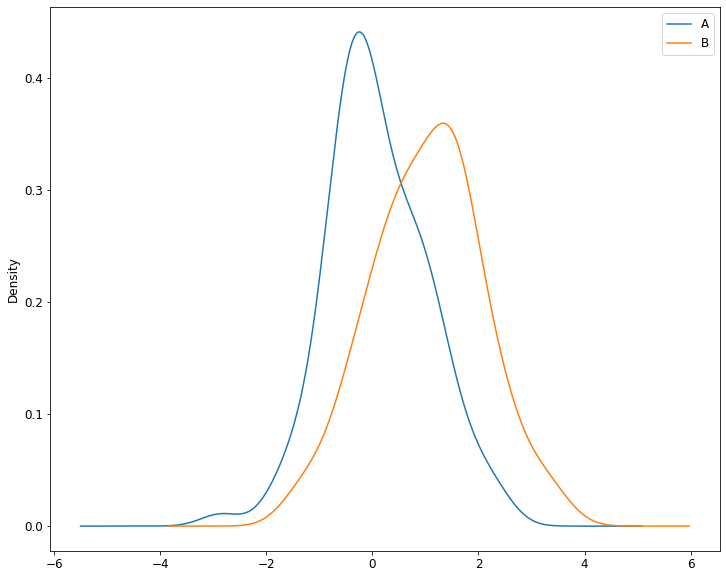

In [ ]:
df.groupby('Group').Observations.plot.kde(legend=True);

In [ ]:
'''
Options for alternative-parameter:
'two-sided' (default): H1: difference in means not equal to value

'larger' :   H1: difference in means larger than value

'smaller' :  H1: difference in means smaller than value
'''

tval, pval, df = sm.stats.ttest_ind(samples_A, samples_B)
pval, df

(2.1463510921991572e-10, 198.0)

Ex: Conduct a 2 sample t-test with unequal variance (Welch t-test) in Python.

"
In statistics, Welch's t-test, or unequal variances t-test, is a two-sample location test which is used to test the hypothesis that two populations have equal means. It is named for its creator, Bernard Lewis Welch, and is an adaptation of Student's t-test, and is more reliable when the two samples have unequal variances and/or unequal sample sizes"

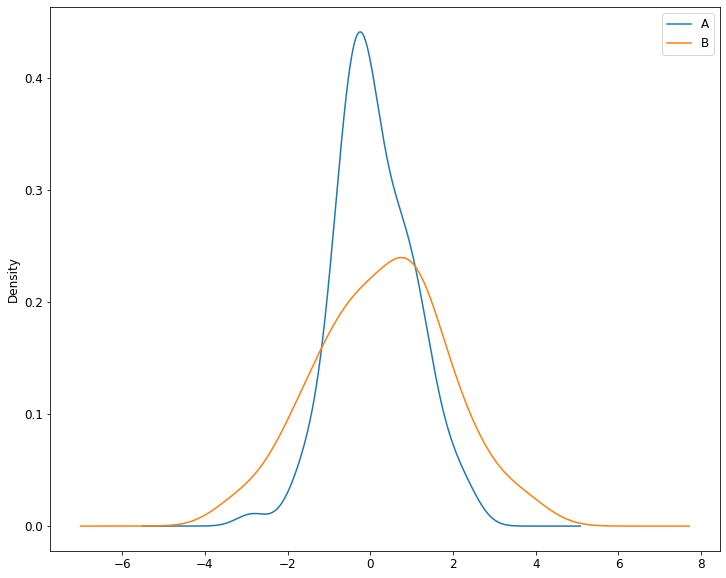

In [ ]:
import seaborn as sns
np.random.seed(5)
samples_A = np.random.normal(size=n)
samples_B = np.random.normal(size=n, loc=0.25, scale=1.5)

df = pd.DataFrame({
    'Observations': np.concatenate([samples_A, samples_B]),
    'Group':  np.repeat(['A', 'B'], repeats=n)
})

df.groupby('Group').Observations.plot.kde(legend=True);

In [ ]:
# Assumption same variance
tval, pval, df = sm.stats.ttest_ind(samples_A, samples_B)
print('Same variance:', pval)

tval, pval, df = sm.stats.ttest_ind(samples_A, samples_B, usevar='unequal')
print('Different variance:', pval)

Same variance: 0.2738083098651563
Different variance: 0.27410098457197557


Ex: Conduct a test for difference in ratios in Python.

In [ ]:
counts = np.array([5, 12])
nobs = np.array([83, 99])
stat, pval = sm.stats.proportions_ztest(counts, nobs)
print('{0:0.3f}'.format(pval))

0.159


Ex: Conduct an equivalence test in Python

In [ ]:
??sm.stats.ttost_ind

Ex: Check whether a coin is unbiased (frequentist)

H0: Coin is unbiased (p=0.5)
HA: Coin is biased

Two approaches: We can use binomial distribution to compute the chance of observing such a result or a more extreme one under the null hypothesis

Or we can use normal approximation, if we have observed enough observations.

In [ ]:
import scipy.stats as sps
# Binomial test
print(sps.binom_test(51, 500, 0.5, alternative='two-sided'))

# Z-Score test
count = 51
nobs = 500
value = .5
stat, pval = sm.stats.proportions_ztest(count, nobs, value)
print('{0:0.3f}'.format(pval))


1.4067060150836533e-80
0.000


In [ ]:
sps.binom(p=0.5, n=500).cdf(51)

7.033530075418266e-81

In [ ]:
1 - sps.binom(p=0.5, n=9).cdf(x=6)

0.08984375

In [ ]:
sps.binom_test(x=7, n=9, p=0.5, alternative="greater")

0.08984375000000001

In [ ]:
sps.binom(p=0.5, n=9).pmf(7)

0.07031249999999994

Ex: Check whether a coin is unbiased (Bayesian)

Ex: Run Chi-square independence test in Python

Assumptions:
* Data values that are a simple random sample from the population of interest.
* Two categorical or nominal variables. Don't use the independence test with continous variables that define the category combinations. However, the counts for the combinations of the two categorical variables will be continuous.
* For each combination of the levels of the two variables, we need at least five expected values. When we have fewer than five for any one combination, the test results are not reliable.

Manual Computation:
* Compute expectation for each cell count under null hypothesis
* Compute ((observed - expected)^2)/expected for each cell
* Sum all cell contributions
* DF for Chi-square is given by (#rows - 1)(#columns - 1)


In [ ]:
# Example taken from official statsmodels documentation

df = sm.datasets.get_rdataset("Arthritis", "vcd").data
tab = pd.crosstab(df['Treatment'], df['Improved'])

tab = tab.loc[:, ["None", "Some", "Marked"]]

data = df[["Treatment", "Improved"]]
table = sm.stats.Table.from_data(data)

In [ ]:
table.table_orig

Improved,Marked,None,Some
Treatment,,,
Placebo,7,29,7
Treated,21,13,7


In [ ]:
table.fittedvalues

Improved,Marked,None,Some
Treatment,,,
Placebo,14.333333,21.5,7.166667
Treated,13.666667,20.5,6.833333


In [ ]:
# Actual Chi2 test of independence test
rslt = table.test_nominal_association()
rslt.pvalue

0.0014626434089526352

Ex: Run a Mann-Whitney-U-test in Python

**From statsmodels documentation**:

Statistics and tests for the probability that x1 has larger values than x2.

p is the probability that a random draw from the population of the first sample has a larger value than a random draw from the population of the second sample, specifically

p = P(x1 > x2) + 0.5 * P(x1 = x2)

This is a measure underlying Wilcoxon-Mann-Whitney’s U test, Fligner-Policello test and Brunner-Munzel test, and Inference is based on the asymptotic distribution of the Brunner-Munzel test. The half probability for ties corresponds to the use of midranks and make it valid for discrete variables.

The Null hypothesis for stochastic equality is p = 0.5, which corresponds to the Brunner-Munzel test.

Assumptions: 
* equal variance 
* or equal distribution under the Null hypothesis. 

Variants:
* Fligner-Policello test allows for unequal variances but assumes continuous distribution, i.e. no ties. 
* Brunner-Munzel extend the test to allow for unequal variance and discrete or ordered categorical random variables.

Brunner and Munzel recommended to estimate the p-value by t-distribution when the size of data is 50 or less. If the size is lower than 10, it would be better to use permuted Brunner Munzel test for the test of stochastic equality.


Scipy test alternatives:
The alternative hypothesis, H1, has to be one of the following:

  * 'two-sided' (default): H1: difference in means not equal to value
  * 'larger' :   H1: difference in means larger than value
  * 'smaller' :  H1: difference in means smaller than value

MannwhitneyuResult(statistic=405.0, pvalue=1.517061687331143e-29)

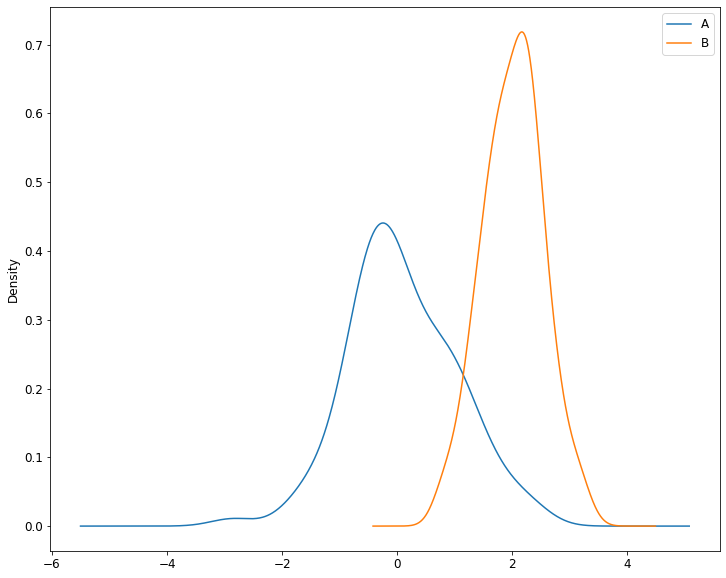

In [ ]:
import scipy.stats as sps
import seaborn as sns

np.random.seed(5)
n = 100
samples_A = np.random.normal(size=n)
samples_B = np.random.normal(size=n, loc=2, scale=0.5)

df = pd.DataFrame({
    'Observations': np.concatenate([samples_A, samples_B]),
    'Group':  np.repeat(['A', 'B'], repeats=n)
})

df.groupby('Group').Observations.plot.kde(legend=True)

sps.mannwhitneyu(samples_A, samples_B, alternative='less') #ttest_ind(samples_A, samples_B)

In [ ]:
import statsmodels.stats.api.n
statsmodels.stats.nonparametric

AttributeError: ignored

In [ ]:
!pip install --upgrade statsmodels

     |████████████████████████████████| 9.5MB 3.1MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


Ex: Run Wilcoxon test in Python

From scipy documentation:
"The Wilcoxon signed-rank test tests the null hypothesis that two related **paired samples** come from the same distribution. In particular, it tests whether the distribution of the differences x - y is symmetric about zero. It is a non-parametric version of the paired T-test.

The two-sided test has the null hypothesis that the median of the differences is zero against the alternative that it is different from zero. The one-sided test has the null hypothesis that the median is positive against the alternative that it is negative (alternative == 'less'), or vice versa (alternative == 'greater.').
"





In [ ]:
import scipy.stats as sps

diff_x_y = d = [9, 8, -4, 123, -14, 28, 31, -41, 48, 1, 56, 601, -67, -175]
print(len(diff_x_y))

sps.wilcoxon(diff_x_y, alternative='greater')

14


WilcoxonResult(statistic=66.0, pvalue=0.19836311647253152)

Ex: Run ANOVA in Python

Assumptions:

* **Normality** – That each sample is taken from a normally distributed population
* **Sample independence** – that each sample has been drawn independently of the other samples
* **Variance Equality** – That the variance of data in the different groups should be the same
* Your **dependent variable** should be **continuous** – e.g., measured on a scale which can be subdivided using increments (i.e. grams, milligrams)

In [ ]:
import scipy.stats as sps

# From scipy's f_oneway documentation
tillamook = [0.0571, 0.0813, 0.0831, 0.0976, 0.0817, 0.0859, 0.0735,
             0.0659, 0.0923, 0.0836]
newport = [0.0873, 0.0662, 0.0672, 0.0819, 0.0749, 0.0649, 0.0835,
           0.0725]
petersburg = [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105]
magadan = [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764,
           0.0689]
tvarminne = [0.0703, 0.1026, 0.0956, 0.0973, 0.1039, 0.1045]

sps.f_oneway(tillamook, newport, petersburg, magadan, tvarminne)

F_onewayResult(statistic=7.121019471642447, pvalue=0.0002812242314534544)

Ex: Run Kruskal-Wallis in Python

Alternative to ANOVA, when its assumptions are violated.

Source: https://www.statisticshowto.com/kruskal-wallis/

* H0: Population median of all of the groups are equal
* H1: At least one median is different

Assumptions:
* One **independent variable** with **two or more levels** (independent groups). The test is more commonly used when you have three or more levels. For two levels, consider using the Mann Whitney U Test instead.
* **Ordinal scale, Ratio Scale or Interval scale** dependent variables.
* Your observations should be **independent**.
* All groups should have the **same shape distributions**.



In [ ]:
sps.kruskal(tillamook, newport, petersburg, magadan, tvarminne)

KruskalResult(statistic=16.404810589080256, pvalue=0.0025214014537637097)

In [ ]:
import string

string.ascii_lowercase

'abcdefghijklmnopqrstuvwxyz'

In [ ]:
'b' > 'A'

True

Ex: Create bootstrap confidence intervals in Python

First naive CI for sample standard deviation.

In [ ]:
import numpy as np
import scipy.stats as sps

from sklearn.utils import resample

np.random.seed(5)
X = np.random.normal(size=50)

orig_std = np.std(X, ddof=1)
bootstrap_samples = np.stack([resample(X) for _ in range(1000)])
bootstrap_stds = np.std(bootstrap_samples, ddof=1, axis=1)

boots_ci = np.quantile(bootstrap_stds, q=np.array([0.025, 0.975]))
print('Sample Std: {0:.3f} Bootstrapped CI: ({1:.3f}, {2:.3f})'.format(
    orig_std, 
    boots_ci[0], 
    boots_ci[1])) 

Sample Std: 0.855 Bootstrapped CI: (0.671, 1.039)


Éx: Create an animation in Python 

Can be done via matplotlib animation functions

In [ ]:
def animate(i):
    data = df.iloc[:int(i+1)] 
    graph = sns.barplot(y=data['total shootings'], x=data.index, data=data, color="blue")

AttributeError: ignored

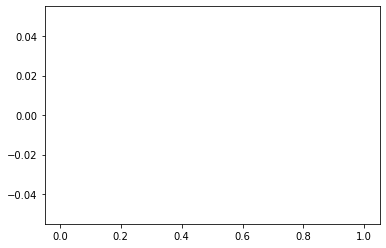

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()

class MovingHist:
  def __init__(self):
    plt.hist([])

  def __call__(self, i):
    data = np.random.normal(loc=i, size=100)
    plt.cla()
    plt.hist(data)

fig = plt.subplot()

ani = FuncAnimation(fig, MovingHist(), frames=np.linspace(0, 2*np.pi, 5),
                    blit=True)
plt.show()

In [ ]:
%matplotlib notebook
import math

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


def beta_pdf(x, a, b):
    return (x**(a-1) * (1-x)**(b-1) * math.gamma(a + b)
            / (math.gamma(a) * math.gamma(b)))


class UpdateDist:
    def __init__(self, ax, prob=0.5):
        self.success = 0
        self.prob = prob
        self.line, = ax.plot([], [], 'k-')
        self.x = np.linspace(0, 1, 200)
        self.ax = ax

        # Set up plot parameters
        self.ax.set_xlim(0, 1)
        self.ax.set_ylim(0, 10)
        self.ax.grid(True)

        # This vertical line represents the theoretical value, to
        # which the plotted distribution should converge.
        self.ax.axvline(prob, linestyle='--', color='black')

    def __call__(self, i):
        # This way the plot can continuously run and we just keep
        # watching new realizations of the process
        if i == 0:
            self.success = 0
            self.line.set_data([], [])
            return self.line,

        # Choose success based on exceed a threshold with a uniform pick
        if np.random.rand(1,) < self.prob:
            self.success += 1
        y = beta_pdf(self.x, self.success + 1, (i - self.success) + 1)
        self.line.set_data(self.x, y)
        return self.line,

# Fixing random state for reproducibility
np.random.seed(19680801)


fig, ax = plt.subplots()
ud = UpdateDist(ax, prob=0.7)
anim = FuncAnimation(fig, ud, frames=100, interval=100, blit=True)
plt.show()


<IPython.core.display.Javascript object>

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py", line 196, in process
    func(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/matplotlib/animation.py", line 1467, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


In [ ]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

n = 100
number_of_frames = 10
data = np.random.rand(n, number_of_frames)

def update_hist(num, data):
    plt.cla()
    plt.hist(data[num])

fig = plt.figure()
hist = plt.hist(data[0])

animation = animation.FuncAnimation(fig, update_hist, number_of_frames, fargs=(data,))
plt.show()

<IPython.core.display.Javascript object>

In [ ]:
ax.hist([])

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

In [ ]:
np.linspace(0, 2*np.pi, 5)

array([0.        , 1.57079633, 3.14159265, 4.71238898, 6.28318531])

In [ ]:
??FuncAnimation

Ex: Run permutation test in Python

Ex: Conduct a sample size computation for t-test

Ex: Assuming that you have 9 flips with a coin, how many heads would you need to observe to conclude with 90% confidence, that the coin is biased?

H0: p=0.5

HA: p>0.5

alpha = 0.1

In [ ]:
import scipy.stats as sps

# 3 ways to get the result

# Use CDF
print(1 - sps.binom.cdf(k=6, n=9, p=0.5))
print('We need 7 heads')

# Add together pmf for 7, 8, and 9 flips.
print(sps.binom.pmf(k=7, n=9, p=0.5) + sps.binom.pmf(k=8, n=9, p=0.5) + sps.binom.pmf(k=9, n=9, p=0.5))
print('We need 7 heads')

# Via the binomial test:
for i in range(1, 10):
  print(i, sps.binom_test(x=i, n=9, p=0.5, alternative='greater'))


0.08984375
We need 7 heads
0.08984374999999993
We need 7 heads
1 0.998046875
2 0.98046875
3 0.91015625
4 0.74609375
5 0.5000000000000001
6 0.25390625
7 0.08984375000000001
8 0.01953125
9 0.001953125


In [ ]:
for i in range(1, 10):
  print(i, sps.binom_test(x=i, n=9, p=0.5, alternative='greater'))

1 0.998046875
2 0.98046875
3 0.91015625
4 0.74609375
5 0.5000000000000001
6 0.25390625
7 0.08984375000000001
8 0.01953125
9 0.001953125


### Scipy Stats Interface

In [ ]:
import scipy.stats as scs
import numpy as np

In [ ]:
??scs.norm.rvs

In [ ]:
### Sample random Gaussian distribution
np.random.seed(5)
random_samples = scs.norm.rvs(loc=2., scale=3., size=(1000,))
random_samples.mean()

2.0998310836785663

In [ ]:
### Fit Gaussian distribution to data
scs.norm.fit_loc_scale(random_samples)

(2.0998310836785663, 2.9696664852667296)

In [ ]:
### Gaussian methods
print('pdf', scs.norm.pdf(random_samples[0]))
print('ppf - Inverse quantile function', scs.norm.ppf(0.95))
print('cdf - Cumulative distribution function', scs.norm.cdf(1.64485))
print('interval - Compute confidence interval', 
      scs.norm.interval(0.95, loc=2., scale=3.))

pdf 0.0015926259521110147
ppf - Inverse quantile function 1.6448536269514722
cdf - Cumulative distribution function 0.9499996259309215
interval - Compute confidence interval (-3.879891953620162, 7.879891953620162)


#### Simple Random Walk example for VaR

Assume N(0.01, 1) log-differences with the potential for a strong downfall ()

Scipy.stats seems to use the standard-gamma distribution, while numpy uses just the gamma distribution, numpy pdf:

p(x) = x^{k-1}\frac{e^{-x/\theta}}{\theta^k\Gamma(k)}

Mean of this distribution: k*\theta

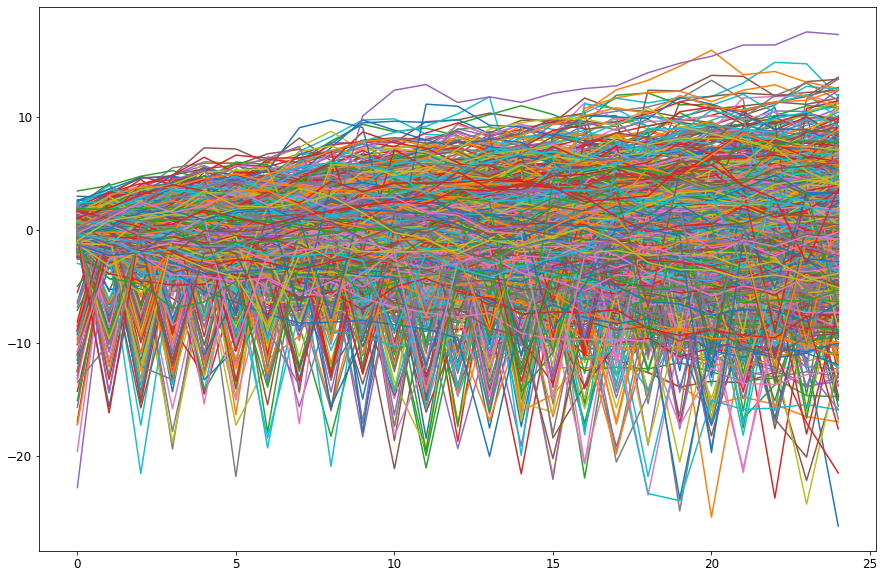

In [ ]:
import matplotlib.pyplot as plt

plt.rc('figure', figsize=(15, 10))
plt.rc('font', size=12)

np.random.seed(5)
samples = np.random.normal(loc=0.01, size=(1000, 25))
jump_events = np.random.binomial(1, 0.05, size=samples.shape)
jumps = - jump_events*np.random.gamma(shape=10., scale=1., size=samples.shape)

rws = np.cumsum(samples, axis=1) + jumps

plt.plot(np.arange(25), rws.transpose());

In [ ]:
### Get 95% VaR for t=25
np.percentile(rws[:,24], q=5)

-9.396933893745832

In [ ]:
??np.percentile

In [ ]:
np.sum(rws[:,24] < -9.3969)

50

In [ ]:
sps.percentileofscore(rws[:,24], score=-9.396933893745832)

5.0

In [ ]:
np.mean(rws[:,24] < 5)

0.82

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


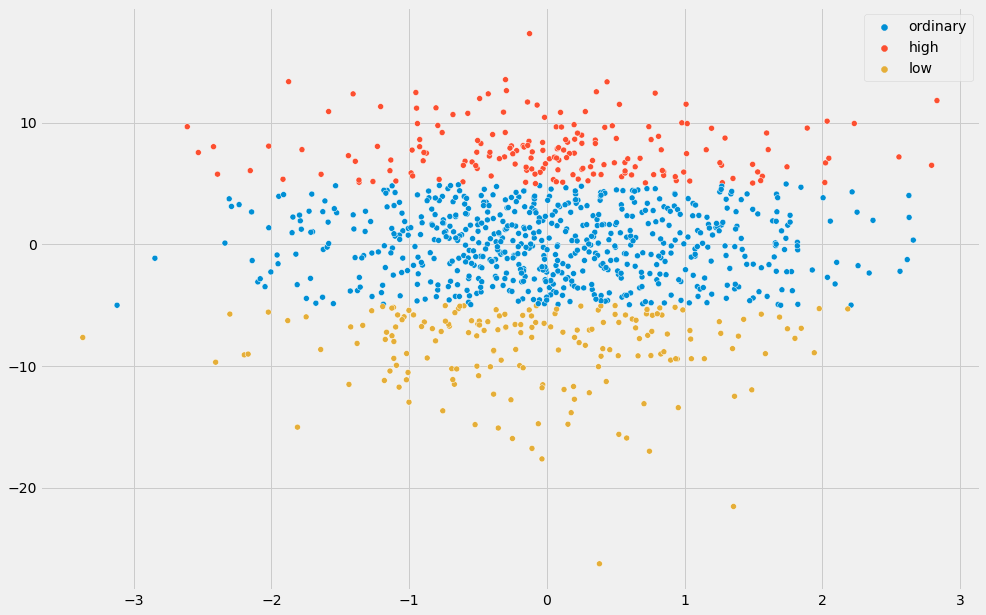

In [ ]:
import seaborn as sns
from matplotlib import style
style.use("fivethirtyeight")

last_obs = rws[:, 24]
condlist = [last_obs < -5, last_obs > 5]
grps = np.select(condlist, ['low', 'high'], default='ordinary')

sns.scatterplot(np.random.normal(size=last_obs.shape), last_obs, hue=grps);

In [ ]:
### Assume 

Ex: Compute bootstrap confidence interval for the standard deviation

In [ ]:
import numpy as np

np.random.seed(5)

scale = 1.
shape = 2.

ss = np.random.gamma(scale=scale, shape=shape, size=100)

obs_std = np.std(ss, ddof=1)

In [ ]:
obs_std

1.5736645256285748

In [ ]:
# analytic std
np.sqrt(shape*scale**2)

1.4142135623730951

In [ ]:
%%time
## Percentile Bootstrap CI
from sklearn.utils import resample

nbstraps = 1000

perc_bsamples = [
    np.std(resample(ss, n_samples=ss.shape[0], replace=True), ddof=1)
      for _ in range(nbstraps)
]

print(np.percentile(perc_bsamples, q=(2.5, 97.5)))

[1.21800108 1.86636583]
CPU times: user 110 ms, sys: 5.97 ms, total: 116 ms
Wall time: 183 ms


In [ ]:
## empirical boostrap
# Can reduce bias in boostrap estimates in contrast to percentile approach
# https://stats.stackexchange.com/questions/355781/is-it-true-that-the-percentile-bootstrap-should-never-be-used

emp_bsamples = [
    np.std(resample(ss, n_samples=ss.shape[0], replace=True), ddof=1)
      for _ in range(nbstraps)
]

print('Percentile bootstrap', np.percentile(emp_bsamples, q=(2.5, 97.5)))
print('Empiricial bootstrap', 2*obs_std - np.percentile(emp_bsamples, q=(97.5, 2.5)))

Percentile bootstrap [1.23041026 1.86065585]
Empiricial bootstrap [1.2866732  1.91691879]


In [ ]:
### CI based on parametric assumption
# Basic idea is that (n-1)*s^2 / sigma^2 is Chi-squared distributed with n-1 dofs
# s^2 = sample variance and sigma^2 = population variance
# From this it follows:
# P(X0.025 <= (n-1)s^2 / sigma^2 <= X0.975)
# for a 95% CI
# Some basic algebra gives:
# P((n - 1)*s^2 / X0.025 >= sigma^2 >= (n - 1)*s^2 / X0.975)

import scipy.stats as scs

nmin1 = ss.shape[0] - 1
lower, upper = scs.chi2.ppf(q=(0.025, 0.975), df=nmin1)
svar = np.var(ss, ddof=1)

np.sqrt(nmin1*svar/upper), np.sqrt(nmin1*svar/lower) 

(1.3816882258711236, 1.8280871395576634)

### Combinatorics

In [ ]:
??scs.chi2

In [ ]:
# Bootstrapping data with numpy directly
import numpy as np

np.random.seed(5)

data = np.random.normal(size=(10,2))
idx = np.arange(10)
rs_idx = np.random.choice(idx, replace=True, size=idx.shape)
rs_idx

array([0, 5, 0, 0, 4, 4, 9, 3, 2, 4])

In [ ]:
data[rs_idx]

array([[ 0.44122749, -0.33087015],
       [-1.19276461, -0.20487651],
       [ 0.44122749, -0.33087015],
       [ 0.44122749, -0.33087015],
       [ 0.18760323, -0.32986996],
       [ 0.18760323, -0.32986996],
       [-1.51117956,  0.64484751],
       [-0.9092324 , -0.59163666],
       [ 0.10960984,  1.58248112],
       [ 0.18760323, -0.32986996]])

In [ ]:
import scipy.special as ss

In [ ]:
# Compute number of permutations
N = 5
k = 2
ss.perm(N, k, exact=True)

20

In [ ]:
# Manual computation
ss.factorial(5)/ss.factorial(N - k)

20.0

In [ ]:
# Compute number of combinations
ss.comb(N, k, exact=True)

10

In [ ]:
Manual computation
ss.factorial(N)/(ss.factorial(k)*ss.factorial(N - k))

10.0

Ex: Compute permutation splits

In [ ]:
np.random.seed(5)

samp1 = np.random.normal(size=(20, 3))
samp2 = np.random.normal(size=(20, 3))

all_samp = np.concatenate([samp1, samp2], axis=0)

perm_samp1 = np.random.choice(
    np.arange(all_samp.shape[0]), 
    size=samp1.shape[0],
    replace=False)

all_samp[perm_samp1]

array([[ 0.19766009,  1.33484857, -0.08687561],
       [-0.9092324 , -0.59163666,  0.18760323],
       [ 0.34691933,  0.74572695,  0.77690759],
       [ 1.14150774, -0.50175555, -0.07915136],
       [-1.75374086,  0.63029648,  0.49832921],
       [-0.59835993, -0.2434197 ,  2.08851469],
       [ 1.56153229, -0.30585302, -0.47773142],
       [-0.69282634, -0.59340277,  0.78823794],
       [-0.2151878 , -0.76076031, -0.71116323],
       [-0.25209213,  0.10960984,  1.58248112],
       [-1.39707402,  0.87265462, -0.20211818],
       [ 1.18906073, -0.07359332, -2.85968797],
       [ 0.44122749, -0.33087015,  2.43077119],
       [-1.51117956,  0.64484751, -0.98060789],
       [ 1.82136474, -0.42703139, -1.16470191],
       [-0.57751323,  1.15220477, -0.10716398],
       [-0.85685315, -0.87187918, -0.42250793],
       [ 2.23796561, -1.4812592 , -0.01694532],
       [-0.36331088,  0.00328884, -0.10593044],
       [ 1.01813761, -0.84646862,  2.52080763]])

In [ ]:
base_bool_mask = np.concatenate([
  np.repeat(True, repeats=samp1.shape[0]),
  np.repeat(False, repeats=samp2.shape[0])
], axis=0)

perm = np.random.choice(base_bool_mask, replace=False, size=base_bool_mask.shape[0])
perm

psamp1 = all_samp[perm]
psamp2 = all_samp[~perm]

In [ ]:
psamp2

array([[ 0.44122749, -0.33087015,  2.43077119],
       [-0.25209213,  0.10960984,  1.58248112],
       [-0.35882895,  0.6034716 , -1.66478853],
       [-0.85685315, -0.87187918, -0.42250793],
       [ 0.79305332, -0.63157163, -0.00619491],
       [ 0.19766009,  1.33484857, -0.08687561],
       [ 1.56153229, -0.30585302, -0.47773142],
       [ 0.10073819,  0.35543847,  0.26961241],
       [ 1.29196338,  1.13934298,  0.4944404 ],
       [ 0.22125412, -1.31077313, -0.68956523],
       [-0.57751323,  1.15220477, -0.10716398],
       [-0.82412345,  0.56813272,  0.01275832],
       [ 0.7893664 , -1.87774088,  1.53875615],
       [-0.59835993, -0.2434197 ,  2.08851469],
       [-0.2151878 , -0.76076031, -0.71116323],
       [-0.69282634, -0.59340277,  0.78823794],
       [-0.44542999, -0.48212019,  0.49355766],
       [-1.75374086,  0.63029648,  0.49832921],
       [-1.23238611,  0.72695326,  0.04595522],
       [-2.33562182, -1.16727845,  0.45765807]])

In [ ]:
np.concatenate([samp1, samp2], axis=0)

(40, 3)

In [ ]:
choicelist

[array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])]

Ex: correlated Gaussians

Idea: Adding 2 Gaussians gives you a new Gaussian, manipulate them in a way that the new Gaussian (~N(0,1)) fulfills the correlation requirement with one of the original ones.

X, Y ~ N(0, 1)

Z = aX + bY
s.t. sigma_Z = 1

cov(X, Z) = rho * sigma_X * sigma_Z = E[XA] + E[X]E[Y]

E[X]E[Y] = 0

rho * sigma_X * sigma_Z = E[XA] = E[aX^2 + bXY] = aE[X^2] + bE[XY]

X and Y are independent, that is, E[XY] = E[X]E[Y] = 0. Consequently, b has no influence on the covariance (as long as b!=0).

Moreoever, by X~N(0,1), E[X^2] = 1 and sigma_X, sigma_Z being 1.

Therefore:

a = rho

To fulfill the constraint that sigma_Z = 1:
V[Z] = a^2 * V[X] + b^2 * V[Y]
1 = rho^2 * 1 + b^2 * 1
b = sqrt(1 - rho^2)

Ultimately, this means we can create correlated Gaussian variables by using:

Z = rho * X + sqrt(1 - rho^2)*Y

In [ ]:
import numpy as np

sigma_X = 1
sigma_Y = 1
rho = 0.7
nobs = 10000

a = rho
b = np.sqrt(1 - rho**2)

np.random.seed(5)

X = np.random.normal(size=(nobs,))
Y = np.random.normal(size=(nobs,))

Z = a*X + b*Y

print('Mean: {0:.3f}, Std: {1:.3f}, Corr: {2:.3f}'.format(
    np.mean(Z), 
    np.std(Z), 
    np.corrcoef(X, Z)[1,0])
)

Mean: 0.002, Std: 1.006, Corr: 0.701


Ex: Create correlated, Gaussian variables via correlation matrix approach

In [ ]:
corr_mat = np.array([
  [1, 0.7, 0.2],
  [0.7, 1, 0.5],
  [0.2, 0.5, 1]
])
print(corr_mat)

std_vec = np.array([1, 1.5, 2])
print(std_vec)

# Via standard deviation matrix
std_mat = np.eye(std_vec.shape[0])
np.fill_diagonal(std_mat,  val=std_vec)

cov_mat = std_mat @ corr_mat @ std_mat

# Or via broadcasting
cov_mat = std_vec.reshape((-1,1)) * corr_mat * std_vec

cov_mat

[[1.  0.7 0.2]
 [0.7 1.  0.5]
 [0.2 0.5 1. ]]
[1.  1.5 2. ]


array([[1.  , 1.05, 0.4 ],
       [1.05, 2.25, 1.5 ],
       [0.4 , 1.5 , 4.  ]])

In [ ]:
L = np.linalg.cholesky(cov_mat)

np.random.seed(5)

std_samples = np.random.normal(size=(10000, 3))

proj_samples = std_samples @ L.transpose()

with np.printoptions(precision=3, suppress=True):
  print('Means', np.mean(proj_samples, axis=0))
  print('Variances:', np.var(proj_samples, axis=0))
  print('Correlation Matrix:\n', np.corrcoef(proj_samples, rowvar=False))  

Means [0.004 0.008 0.013]
Variances: [0.996 2.251 4.066]
Correlation Matrix:
 [[1.    0.7   0.205]
 [0.7   1.    0.501]
 [0.205 0.501 1.   ]]


Ex: Get posterior distribution of flipped coin (also evaluate credibility interval)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps

In [ ]:
# Let's start with a beta prior on the probability parameter of the binomial 
# distribution 
a_prior = 1
b_prior = 1

x = np.linspace(0, 1, num=25)
px = sps.beta.pdf(x, a=a_prior, b=b_prior)

In [ ]:
# Generate some random data
p = 0.88
data = np.random.binomial(1, p=p, size=125)

In [ ]:
nsuc = np.sum(data == 1)
nfail = data.shape[0] - nsuc

nsuc, nfail

(103, 22)

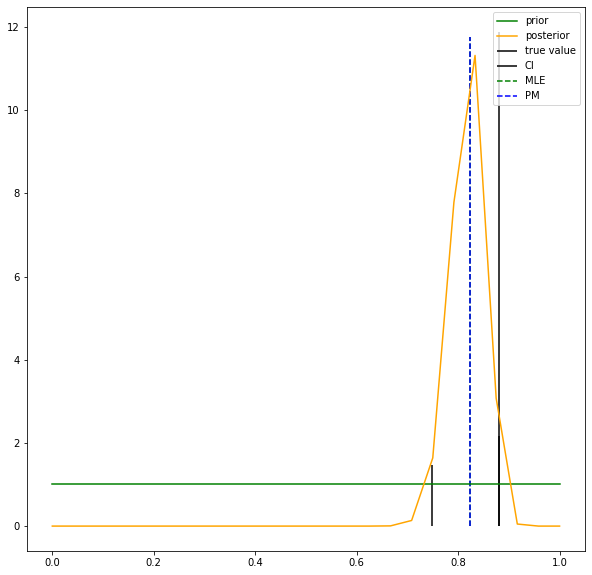

In [ ]:
a_posterior = a_prior + nsuc
b_posterior = b_prior + nfail

beta = sps.beta(a=a_posterior, b=b_posterior)
postx = beta.pdf(x)

low, up = beta.interval(0.95)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1)

post_mean = beta.mean()
mle_estim = nsuc / (nsuc + nfail)

ax.plot(x, px, color='green', label='prior')
ax.plot(x, postx, color='orange', label='posterior')
ax.vlines(x=p, ymin=0, ymax=plt.ylim()[1], label='true value')
ax.vlines(x=low, ymin=0, ymax=beta.pdf(low), label='CI', color='black')
ax.vlines(x=up, ymin=0, ymax=beta.pdf(up), color='black')
ax.vlines(
    x=mle_estim, ymin=0, ymax=beta.pdf(mle_estim), color='g', linestyles='--', label='MLE')
ax.vlines(
    x=mle_estim, ymin=0, ymax=beta.pdf(mle_estim), color='b', linestyles='--', label='PM')
ax.legend(loc='best')

In [ ]:
p, low, up

(0.88, 0.7476686317323061, 0.8806248171548374)

In [ ]:
beta.mean()

0.8188976377952756

In [ ]:
mle_estim

0.824

Ex: Constrained optimization example via scipy

In [ ]:
## MLE estimate via optimization
from scipy.optimize import minimize
from scipy.optimize import minimize_scalar
def f_to_opt(p):
  return -np.prod(sps.bernoulli.pmf(k=data, p=p))

res = minimize(f_to_opt, x0=0.6, bounds=[(0.,1.)])


In [ ]:
minimize_scalar(f_to_opt, bounds=(0, 1), method='bounded')

     fun: -5.517997466111963e-26
 message: 'Solution found.'
    nfev: 12
  status: 0
 success: True
       x: 0.8239999308970015

Ex: Suppose coin flip pays 1 Dollar heads, 0 Dollar tails, how many observations do you need to be 95% confident that you will have at least 2000 Dollar.

In [ ]:
# Use CLT
# sum(X) ~ N(nobs*p, sigma/sqrt(nobs))
# sigma = sqrt(nobs*p(1-p))

# Lower bound: nobs*p - z_score*sqrt(p(1-p)/nobs)
# Simplifies: nobs*p - z_score*sqrt(p(1-p)/nobs)
# 2000 = nobs*0.5 - 1.64*sqrt(0.25/nobs)


In [ ]:
from scipy.optimize import minimize_scalar
def func_to_optim(nobs):
  return (1000 - nobs*0.5 + 1.64*np.sqrt(nobs*0.25))**2

minimize_scalar(func_to_optim, bounds=(1000,3000), method='bounded')

     fun: 1.028254648478016e-15
 message: 'Solution found.'
    nfev: 9
  status: 0
 success: True
       x: 2074.7001576545126

In [ ]:
best_val = 2000
for nobs in range(1000, 3000):
  mse = (1000 - nobs*0.5 + 1.64*np.sqrt(nobs*0.25))**2
  if mse < best_val:
    best_val = mse
    best_nobs = nobs

In [ ]:
best_nobs

2075

In [ ]:
 nobs = 2100
 (2000 - nobs*0.5 + 1.64*np.sqrt(0.25/nobs))**2

902533.9986674892

In [ ]:
nobs = 4000
nobs*0.5 - 1.64*np.sqrt(0.25/nobs)

1999.9870346615933

In [ ]:
import scipy.stats as sps
import scipy.optimize as spo

In [ ]:
data = sps.lognorm.rvs(s=1, size=1000)

sps.lognorm.fit(data)

(1.0445718192476945, 0.001702234021299931, 0.9556308131155621)

In [ ]:
sps.lognorm.fit

In [ ]:
data = sps.poisson.rvs(mu=3., size=1000)
sps.norm.fit_loc_scale(data)

(3.163, 1.7551156657041154)

Ex: Conduct study of the kelly criterion

In [85]:
## Maximize log utility
# risk-free rate
r = 0.0


mu = 0.1
sigma = 3

# In space of the lognormal distribution
mu_logn = np.exp(mu + sigma**2/2)
sigma_logn = np.sqrt((np.exp(sigma**2) - 1)*(2*mu + sigma**2))

kelly = (mu_logn - r) / sigma_logn**2
kelly

0.0013346581776290541

In [86]:
import numpy as np

np.random.seed(5)

rws = np.random.normal(loc=mu, scale=sigma, size=(1000, 250))
rws = np.exp(rws)
rws = np.cumprod(rws, axis=1)

(array([999.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([1.14819078e-40, 1.57848981e+45, 3.15697962e+45, 4.73546943e+45,
        6.31395923e+45, 7.89244904e+45, 9.47093885e+45, 1.10494287e+46,
        1.26279185e+46, 1.42064083e+46, 1.57848981e+46, 1.73633879e+46,
        1.89418777e+46, 2.05203675e+46, 2.20988573e+46, 2.36773471e+46,
        2.52558369e+46, 2.68343267e+46, 2.84128166e+46, 2.99913064e+46,
        3.15697962e+46, 3.31482860e+46, 3.47267758e+46, 3.63052656e+46,
        3.78837554e+46, 3.94622452e+46, 4.10407350e+46, 4.26192248e+46,
        4.41977146e+46, 4.57762045e+46, 4.73546943e+46, 4.89331841e+46,
        5.05116739e+46, 5.20901637e+46, 5.36686535e+46, 5.52471433e+46,
        5.

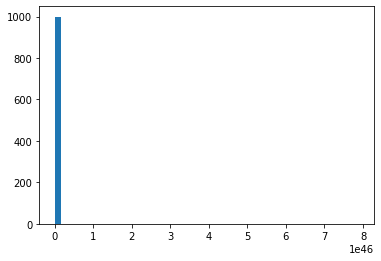

In [87]:
import matplotlib.pyplot as plt

plt.hist(rws[:,99], bins=50)

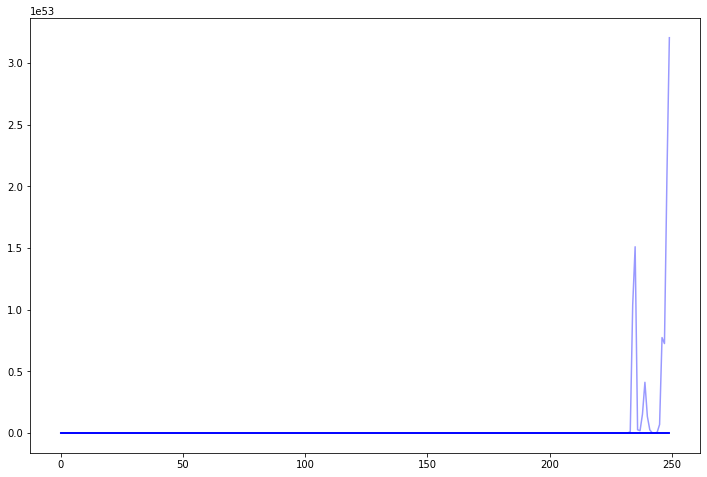

In [88]:
fig = plt.figure(figsize=(12,8))
plt.plot(rws.transpose()[:,:10], color='blue', alpha=0.4);

In [89]:
%%time
time_points = 250
bet_fracs = [kelly] + np.linspace(0.00001, 0.2, num=40).tolist()

res_lst = []

for bet_frac in bet_fracs:

  wealth = np.ones(shape=(1000, time_points+1))

  for i in range(wealth.shape[1] - 1):
    wealth[:,i+1] = (1 - bet_frac)*wealth[:,i] + bet_frac*wealth[:,i]*rws[:,i]

  res_lst.append(wealth.mean(axis=0))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in multiply
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in add
  # This is added back by InteractiveShellApp.init_path()


CPU times: user 240 ms, sys: 1.47 ms, total: 242 ms
Wall time: 244 ms


In [90]:
res = np.stack(res_lst, axis=1)

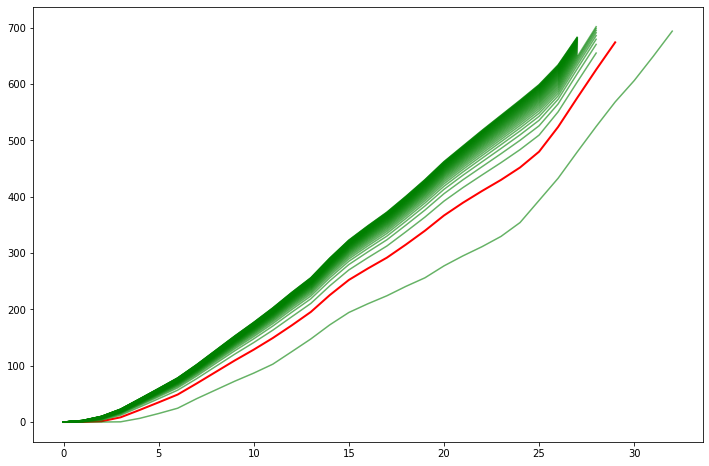

In [91]:
figure = plt.figure(figsize=(12, 8))
plt.plot(np.log(res[:,0]), color='red', linewidth=2)
for i in range(1, 41):
  plt.plot(np.log(res[:,i]), color='green', alpha=0.6)


Ex: Kelly criterion simulation based on the example 8.2 from "A first course in quantitative finance"

In [2]:
mu = 0.0002
sd = 0.02

kelly = mu / sd**2
kelly

0.5

In [20]:
import numpy as np

np.random.seed(5)
time_points = 100


rws = 1 + np.random.normal(loc=mu, scale=sd, size=(10000, time_points))
rws = np.cumprod(rws, axis=1)

In [21]:
bet_fracs = [kelly] + np.linspace(0.01, 0.99, num=15).tolist()

res_lst = []

for bet_frac in bet_fracs:

  wealth = np.ones(shape=(10000, time_points+1))

  for i in range(wealth.shape[1] - 1):
    wealth[:,i+1] = (1 - bet_frac)*wealth[:,i] + bet_frac*wealth[:,i]*rws[:,i]

  res_lst.append(wealth.mean(axis=0))

In [22]:
bet_fracs

[0.5,
 0.01,
 0.07999999999999999,
 0.15,
 0.21999999999999997,
 0.29,
 0.36,
 0.42999999999999994,
 0.49999999999999994,
 0.57,
 0.6399999999999999,
 0.71,
 0.7799999999999999,
 0.8499999999999999,
 0.9199999999999999,
 0.99]

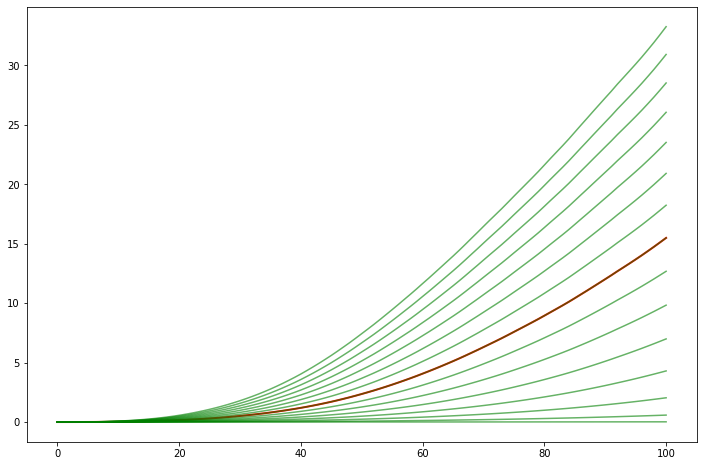

In [23]:
res = np.stack(res_lst, axis=1)

figure = plt.figure(figsize=(12, 8))
plt.plot(np.log(res[:,0]), color='red', linewidth=2)
plt.plot(np.log(res[:,1:]), color='green', alpha=0.6);

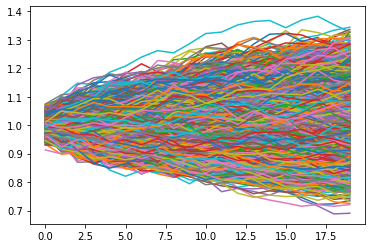

In [9]:
import matplotlib.pyplot as plt

plt.plot(rws.transpose());